script for the H3 lin reference calculation

In [1]:
from pyscf import gto, scf, mcscf, fci
import numpy as np
import matplotlib.pyplot as plt
from pyblock2._pyscf.ao2mo import integrals as itg
from pyblock2.driver.core import DMRGDriver, SymmetryTypes
import os 
from pyscf.tools import molden
import json


Use this to delete the temp files BEFORE a dmrg calculation

In [10]:
folder_path = "./tmp2"  #change here the directory where the tmp files are located

for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's a file (not a directory) and delete it
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")

Deleted: ./tmp2/F.MPS.GS.0
Deleted: ./tmp2/F.MPS.GS.1
Deleted: ./tmp2/F.MPS.GS.2
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.0
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.0
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.1
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.1
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.2
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.2
Deleted: ./tmp2/F.MPS.INFO.GS.LEFT.3
Deleted: ./tmp2/F.MPS.INFO.GS.RIGHT.3
Deleted: ./tmp2/F.MPS.GS.-1
Deleted: ./tmp2/GS-mps_info.bin


UHF of H3 linear with sto-3g basis set

In [9]:
H3_lin_initguess = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 1.5, 0, 0,], 
                     ["H", -1.5, 0, 0,]], unit = 'Ångström', basis = 'sto-3g', charge = 0, spin = 1)
uhf_initguess=scf.UHF(H3_lin_initguess)
uhf_initguess.kernel()
dm_init_guess = uhf_initguess.make_rdm1()

H3_lin = gto.M(atom=[["H",0,0,0], ["H",1.7,0,0], ["H",-1.7,0,0]], unit='Ångström', basis='sto-3g', charge=0, spin=1)
uhf3 = scf.UHF(H3_lin)
uhf3.kernel(dm_init_guess)



H3lin_alpha_coeff=uhf3.mo_coeff[0]
H3lin_beta_coeff=uhf3.mo_coeff[1]
H3lin_alpha_en=uhf3.mo_energy[0]
H3lin_beta_en=uhf3.mo_energy[1]
H3lin_alpha_occ=uhf3.mo_occ[0]
H3lin_beta_occ=uhf3.mo_occ[1]
print('Number of alpha coefficients:', len(H3lin_alpha_coeff))
print('Alpha orbital energies: ', H3lin_alpha_en)
print('Number of beta coefficients:', len(H3lin_beta_coeff))
print('Beta orbital energies: ', H3lin_beta_en)

#mo = (uhf3.mo_coeff[0][:,uhf3.mo_occ[0]>0], uhf3.mo_coeff[1][:,uhf3.mo_occ[1]>0])
#overlap = H3_lin.intor('int1e_ovlp')

#print(mo)
#print('S^2 = %.7f, 2S+1 = %.7f' % scf.uhf.spin_square(mo, H3_lin.intor('int1e_ovlp_sph')))
#print(overlap)
#print(overlap.shape)

converged SCF energy = -1.44487535419022  <S^2> = 1.2541732  2S+1 = 2.4528948
converged SCF energy = -1.42275515744468  <S^2> = 1.4693323  2S+1 = 2.6224663
Number of alpha coefficients: 3
Alpha orbital energies:  [-0.47723194 -0.44976456  0.33884402]
Number of beta coefficients: 3
Beta orbital energies:  [-0.45713511  0.28296264  0.36231018]


create molden files to visualise the orbitals

In [4]:
with open('H3lin_sto3g_alpha.molden', 'w') as file_alpha3:
    molden.header(H3_lin, file_alpha3)
    molden.orbital_coeff(H3_lin, file_alpha3, H3lin_alpha_coeff, ene=H3lin_alpha_en, occ=H3lin_alpha_occ)

with open('H3lin_sto3g_beta.molden', 'w') as file_beta3:
    molden.header(H3_lin, file_beta3)
    molden.orbital_coeff(H3_lin, file_beta3, H3lin_beta_coeff, ene=H3lin_beta_en, occ=H3lin_beta_occ)

Plot the energies of each iteration

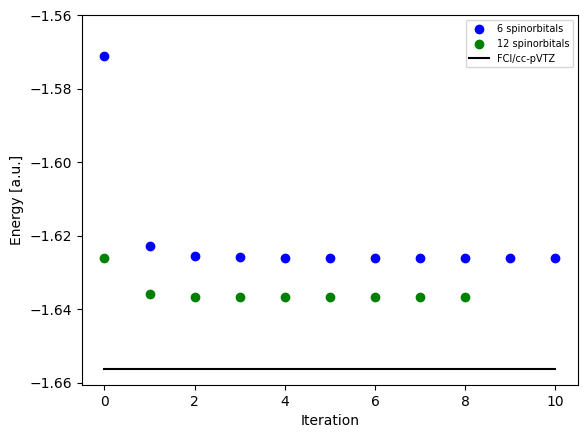

In [10]:
#plot energies of H3 spin optimizer

x1 = np.arange(0, 7, 1)
x2 = np.arange(0,11,1)
x3 = np.arange(0, 9, 1)
FCI_H3 = np.full(11, -1.656308543121)
H3_energies = [-1.571043, -1.575703, -1.583686, -1.620579, -1.620745, -1.588478, -1.485866]
H3_energies_project2 = [-1.571043, -1.575703, -1.583685, -1.511214, -1.563584, -1.516852, -1.526479]
H3_energies_sep_project = [-1.571043, -1.575685, -1.583550, -1.620243, -1.620413, -1.621782, -1.621845]
H3_en_2iter = [-1.621845, -1.621983, -1.621988, -1.624185, -1.624199, -1.624056, -1.623964]
#H3_energies_project4 = [-1.571043, -1.575703, -1.583686, -1.620579, -1.620745, -1.588479, -1.489348]
H3_energies_6_iter = [-1.571043, -1.621845, -1.623964, -1.624079, -1.624091, -1.624039, -1.623925]
H3_energies_10iter = [-1.571043, -1.621845, -1.623964, -1.624079, -1.624091, -1.624039, -1.623925, 
                      -1.623987, -1.623977, -1.623899, -1.623959]
H3_energies_631g_stepwise_crap = [-1.626215, -1.611431, -1.590611, -1.579232, -1.579449, -1.579697, -1.579770, -1.581258, -1.581663, -1.581950]
H3_energies_631g_stepwise = [-1.626213, -1.627825, -1.629681, -1.633395, -1.633592, -1.634125, -1.634306, -1.635500, -1.635718, -1.635904]
H3_energies_simul_update_sto3g = [-1.571041, -1.622701, -1.625417, -1.625899, -1.626033, -1.626067, -1.626079, -1.626078, -1.626052, -1.626081, -1.626064]
H3_energies_simul_update_631g = [-1.626213, -1.635914, -1.636602, -1.636679, -1.636686, -1.636686, -1.636685, -1.636685, -1.636685]

Delta_E = [-0.050802000000000014, -0.002118999999999982, -0.00011500000000008725, -1.1999999999900979e-05, 
           5.199999999994098e-05, 0.00011399999999994748]

fig, ax = plt.subplots()
ax.scatter(x2, H3_energies_simul_update_sto3g, color='blue', label='6 spinorbitals')
ax.scatter(x3, H3_energies_simul_update_631g, color='green', label='12 spinorbitals')
#ax.scatter(x1, H3_energies_sep_project, color='green', label='orbs projected out')
#ax.scatter(x1, H3_en_2iter, color='blue', label='2nd iteration')
#ax.scatter(x2, H3_energies_10iter, color='blue')
ax.plot(x2, FCI_H3, color='black', label='FCI/cc-pVTZ')
ax.legend(loc='upper right', fontsize=7)

ax.set_xlabel('Iteration')
ax.set_ylabel('Energy [a.u.]')
#ax.set_title('H3 linear geometry with r=0.93 Å')
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.4f}'))
#ax.set_xticks(np.arange(0.0, 4.5, 0.5))
#ax.set_xticks(np.arange(0, 10, 1))
#ax.set_xticklabels(['init', 'a_1', 'b_1', 'a_2', 'b_2', 'a_3', 'b_3', 'a_4', 'b_4', 'a_5'])

ax.set_yticks(np.arange(-1.56, -1.68, -0.02))

plt.show()

In [ ]:
num = 1.75 - 9.798772e-01 - 2.221467e-29 #S^2 of initial orbs of spin orb opt code
print(num)

0.7701228


In [ ]:
E_uhf_bohr_1 = []
E_uhf_bohr_2 = []

for i in np.arange(0.5, 2, 0.05):
    H3_lin = gto.M(atom=[["H", 0, 0, 0],
                        ["H", i, 0, 0], 
                        ["H", -i, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1, unit='Bohr')
    uhf=scf.UHF(H3_lin)
    E_uhf_bohr_1.append(uhf.kernel())

for i in np.arange(2.2, 7, 0.2):
    H3_lin = gto.M(atom=[["H", 0, 0, 0],
                        ["H", i, 0, 0], 
                        ["H", -i, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1, unit='Bohr')
    uhf=scf.UHF(H3_lin)
    E_uhf_bohr_2.append(uhf.kernel())

In [ ]:
x1 = np.arange(0.5, 2, 0.05)
x2 = np.arange(2.2, 7, 0.2)
fig, ax = plt.subplots()
ax.scatter(x1, E_uhf_bohr_1, color='blue')
ax.scatter(x2, E_uhf_bohr_2, color='blue')

ax.set_xlabel('Bondlength [Bohr]')
ax.set_ylabel('Energy [Hartree]')

plt.show()




UHF calculation of the same geometry with 6-31g basis set

In [7]:
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 1.2, 0, 0], 
                     ["H", -1.2, 0, 0]], unit = 'Bohr', basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3_lin)
uhf_631g.kernel()
norbs, nelecas = (6, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf_631g, norbs, nelecas).mc1step()[0]


H3lin_631g_alpha_coeff=uhf_631g.mo_coeff[0]
H3lin_631g_beta_coeff=uhf_631g.mo_coeff[1]
H3lin_631g_alpha_en=uhf_631g.mo_energy[0]
H3lin_631g_beta_en=uhf_631g.mo_energy[1]
H3lin_631g_alpha_occ=uhf_631g.mo_occ[0]
H3lin_631g_beta_occ=uhf_631g.mo_occ[1]
#print('Number of alpha coefficients:', len(H3lin_631g_alpha_coeff))
#print('Alpha orbital energies: ', H3lin_631g_alpha_en)
#print('Number of beta coefficients:', len(H3lin_631g_beta_coeff))
#print('Beta orbital energies: ', H3lin_631g_beta_en)
print('Alpha energies: ', H3lin_631g_alpha_en)
print('Beta energies: ', H3lin_631g_beta_en)

#with open('H3lin_631g_alpha.molden', 'w') as file_alpha:
#    molden.header(H3_lin, file_alpha)
#    molden.orbital_coeff(H3_lin, file_alpha, H3lin_631g_alpha_coeff, ene=H3lin_631g_alpha_en, occ=H3lin_631g_alpha_occ)

#with open('H3lin_631g_beta.molden', 'w') as file_beta:
#    molden.header(H3_lin, file_beta)
#    molden.orbital_coeff(H3_lin, file_beta, H3lin_631g_beta_coeff, ene=H3lin_631g_beta_en, occ=H3lin_631g_beta_occ)

converged SCF energy = -1.50136654265539  <S^2> = 0.75919566  2S+1 = 2.0091746
UCASSCF energy = -1.52895930717209
UCASCI E = -1.52895930717209  E(CI) = -3.61229264050542  S^2 = 0.7500000
Alpha energies:  [-0.87749519 -0.3284202   0.32524783  0.79369272  0.8974214   1.9126231 ]
Beta energies:  [-0.77174891  0.15224766  0.38549216  0.81836529  1.0246977   2.00058554]


In [3]:
alpha_rdms_py = np.load('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_sto3g_min/175743603_alpha_1rdm.npy')
beta_rdms_py = np.load('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_sto3g_min/175743603_beta_1rdm.npy')

print(alpha_rdms_py)
print(np.trace(alpha_rdms_py))
print(beta_rdms_py)
print(np.trace(beta_rdms_py))

[[ 9.93195511e-01  9.82203943e-17  2.98717217e-02]
 [ 9.82203943e-17  9.83260939e-01 -1.83257582e-15]
 [ 2.98717217e-02 -1.83257582e-15  2.35435501e-02]]
2.0
[[ 9.76501528e-01  1.12456752e-15 -2.91308635e-02]
 [ 1.12456752e-15  1.67390609e-02  8.51456290e-17]
 [-2.91308635e-02  8.51456290e-17  6.75941064e-03]]
1.0


Export the 6-31g coefficients

In [6]:
np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_631g_coeffs/h3lin_min/093_alphacoeffs.npy', H3lin_631g_alpha_coeff)
np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_631g_coeffs/h3lin_min/093_betacoeffs.npy', H3lin_631g_beta_coeff)

DMRG reference calculation with uhf-631-g

In [3]:
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.93, 0, 0], 
                     ["H", -0.93, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3_lin)
uhf_631g.kernel()

norbs, nelecas = (6, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf_631g, norbs, nelecas).mc1step()[0]

bond_dims = [250] * 4 + [500] * 4
noises = [1e-4] * 4 + [1e-5] * 4 + [0]
thrds = [1e-10] * 8
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf_631g,
    ncore=0, ncas=None, g2e_symm=1)


driver_631g = DMRGDriver(scratch="./tmp2", symm_type=SymmetryTypes.SZ, n_threads=4)
driver_631g.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo_631g = driver_631g.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=1)
ket_631g = driver_631g.get_random_mps(tag="GS", bond_dim=250, nroots=1)
energy_631g = driver_631g.dmrg(mpo_631g, ket_631g, n_sweeps=35, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy_631g)
print('difference dmrg UCASSCF', ref_ucas - energy_631g)

converged SCF energy = -1.59648357874309  <S^2> = 0.78832991  2S+1 = 2.0379695
UCASSCF energy = -1.62627880911235
UCASCI E = -1.62627880911235  E(CI) = -3.0487981933059  S^2 = 0.7500000
integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =       2638

Build MPO | Nsites =     6 | Nterms =       2638 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /     6 .. Mmpo =    30 DW = 0.00e+00 NNZ =       30 SPT = 0.0000 Tmvc = 0.001 T = 0.005
 Site =     1 /     6 .. Mmpo =    66 DW = 0.00e+00 NNZ =      275 SPT = 0.8611 Tmvc = 0.001 T = 0.003
 Site =     2 /     6 .. Mmpo =   110 DW = 0.00e+00 NNZ =      483 SPT = 0.9335 Tmvc = 0.001 T = 0.003
 Site =     3 /     6 .. Mmpo =    66 DW = 0.00e+00 NNZ =     1231 SPT = 0.8304 Tmvc = 0.001 T = 0.004
 Site =     4 /     6 .. Mmpo =    30 DW = 0.00e+00 NNZ =      279 SPT = 0.8591 Tmvc = 0.000 T = 0.002
 Site =     5 /     6 .. Mmpo =     1 DW = 0.00e+00 NNZ =       30 SPT = 0.0000 Tmvc = 0.000 T = 0.001
Ttotal =      0.018

In [ ]:
with open('H3lin_631g_alpha.molden', 'w') as file_alpha3:
    molden.header(H3_lin, file_alpha3)
    molden.orbital_coeff(H3_lin, file_alpha3, H3lin_alpha_coeff, ene=H3lin_alpha_en, occ=H3lin_alpha_occ)

with open('H3lin_631g_beta.molden', 'w') as file_beta3:
    molden.header(H3_lin, file_beta3)
    molden.orbital_coeff(H3_lin, file_beta3, H3lin_beta_coeff, ene=H3lin_beta_en, occ=H3lin_beta_occ)

In [17]:
#extract the 1- & 2-rdms   -6.734506285965836e-10
onerdm_631g = driver_631g.get_1pdm(ket_631g)
twordm_631g = driver_631g.get_2pdm(ket_631g) 

alpha_1rdm_631g=onerdm_631g[0]
beta_1rdm_631g=onerdm_631g[1]
aa_2rdm_631g = twordm_631g[0]
ab_2rdm_631g = twordm_631g[1]
bb_2rdm_631g = twordm_631g[2]

np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_rdms.npy', alpha_1rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/beta_rdms.npy', beta_1rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_alpha_rdms.npy', aa_2rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_beta_rdms.npy', ab_2rdm_631g)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/beta_beta_rdms.npy', bb_2rdm_631g)

print(beta_1rdm_631g)


#alpha_1rdm_npy = np.load('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/alpha_rdms.npy')
#beta_1rdm_npy = np.load('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3lin_631g_min/beta_rdms.npy')

#print(beta_1rdm_npy)

[[ 9.75052519e-01  5.83594748e-09 -3.05162107e-02 -1.37307437e-02
  -2.50696927e-07  1.39122064e-02]
 [ 5.83594748e-09  1.44448627e-02 -2.79966030e-09  1.92385650e-08
   4.84506065e-03  3.16046975e-08]
 [-3.05162107e-02 -2.79966030e-09  4.54844341e-03 -4.12029666e-04
   8.70111688e-09 -3.20305960e-03]
 [-1.37307437e-02  1.92385650e-08 -4.12029666e-04  1.36715962e-03
   5.75485110e-10  8.96322685e-05]
 [-2.50696927e-07  4.84506065e-03  8.70111688e-09  5.75485110e-10
   1.98044856e-03  6.06966937e-09]
 [ 1.39122064e-02  3.16046975e-08 -3.20305960e-03  8.96322685e-05
   6.06966937e-09  2.60656649e-03]]


In [30]:
alpha_int = h1e[0]
beta_int = h1e[1]
aa_int = g2e[0]
ab_int = g2e[1]
bb_int = g2e[2]

aa_2rdm_631g = twordm_631g[0].transpose(0, 3, 1, 2)
aa_2rdm_631g = np.swapaxes(aa_2rdm_631g, 1, 2)
ab_2rdm_631g = twordm_631g[1].transpose(0, 3, 1, 2)
ab_2rdm_631g = np.swapaxes(ab_2rdm_631g, 1, 2)
bb_2rdm_631g = twordm_631g[2].transpose(0, 3, 1, 2)
bb_2rdm_631g = np.swapaxes(bb_2rdm_631g, 1, 2)

one_body_en = np.einsum('ij,ij->', alpha_1rdm_631g, alpha_int) + np.einsum('ij,ij->', beta_1rdm_631g, beta_int)
one_body_en_spinorbopt = 1.658653 - 5.971821
one_body_en_spinorbopt_k9 = 1.657902 - 5.970898
two_body_en = 0.5 * (np.einsum('ijkl,ikjl->', aa_2rdm_631g, aa_int) + 2 * np.einsum('ijkl,ikjl->', ab_2rdm_631g, ab_int) + 
                     np.einsum('ijkl,ikjl->', bb_2rdm_631g, bb_int))

print(one_body_en)
print(one_body_en_spinorbopt)
print(one_body_en_spinorbopt_k9)

print("Difference 1 electron energy", one_body_en - one_body_en_spinorbopt)
print('difference 1 electron energy k9', one_body_en - one_body_en_spinorbopt_k9)
print(ecore)
#print('difference nuclear repulsion', ecore - 1.422527)
print(two_body_en)
print('difference two electron energy', two_body_en - 1.281763)
print('difference two electron energy k9', two_body_en - 1.324209)
#print('difference total energy', energy_631g + 1.608877)



-4.31858177995752
-4.313168
-4.312996
Difference 1 electron energy -0.005413779957519793
difference 1 electron energy k9 -0.005585779957519854
1.4225193841935486
1.269783586662935
difference two electron energy -0.011979413337064981
difference two electron energy k9 -0.054425413337064965


In [8]:
list1 = [i for i in np.arange(0.5, 1.0, 0.1)]
list2 = [a for a in np.arange(1.5, 3.7, 0.1)]
list1.extend(list2)
print(list1)

[0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 1.5, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000004, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002]


DMRG with MRA- Integrals, first the integrals are being imported

In [ ]:
alpha_int_mra = np.load('/workspaces/MRA-OrbitalOptimization/output_folder/h3lin_631g_min_k8/alpha_htensor.npy')
beta_int_mra = np.load('/workspaces/MRA-OrbitalOptimization/output_folder/h3lin_631g_min_k8/beta_htensor.npy')
aa_int_mra = np.load('/workspaces/MRA-OrbitalOptimization/output_folder/h3lin_631g_min_k8/alpha_alpha_gtensor.npy')
ab_int_mra = np.load('/workspaces/MRA-OrbitalOptimization/output_folder/h3lin_631g_min_k8/alpha_beta_gtensor.npy')
bb_int_mra = np.load('/workspaces/MRA-OrbitalOptimization/output_folder/h3lin_631g_min_k8/beta_beta_gtensor.npy')

print(alpha_int_mra)

In [ ]:
h1_mra = (alpha_int_mra, beta_int_mra)
g2_mra = (aa_int_mra, ab_int_mra, bb_int_mra)

H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.93, 0, 0], 
                     ["H", -0.93, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3_lin)
uhf_631g.kernel()

bond_dims = [250] * 30
noises = [1e-4] *  30 + [1e-5] * 30 + [0]
thrds = [1e-8] * 30
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf_631g,
    ncore=0, ncas=None, g2e_symm=1)


driver_631g = DMRGDriver(scratch="./tmp3", symm_type=SymmetryTypes.SZ, n_threads=4)
driver_631g.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo_631g = driver_631g.get_qc_mpo(h1e=h1_mra, g2e=g2_mra, ecore=ecore, iprint=1)
ket_631g = driver_631g.get_random_mps(tag="GS", bond_dim=250, nroots=1)
energy_631g = driver_631g.dmrg(mpo_631g, ket_631g, n_sweeps=35, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy_631g)
print('difference dmrg UCASSCF', ref_ucas - energy_631g)



Plot the dissociation curves with the energy of refined orbitals

In [2]:
#fci reference
energy_fci = []

for i in np.arange(0.6, 7.1, 0.1):
    H3lin_fci = gto.M(atom=[["H", 0, 0, 0],
                            ["H", i, 0, 0], 
                            ["H", -i, 0, 0]], unit = 'Bohr', basis = 'cc-pvtz', charge = 0, spin = 1)
    uhf_h3linfci=scf.UHF(H3lin_fci)
    uhf_h3linfci.kernel()
    fcisolver = fci.FCI(uhf_h3linfci)
    energy_fci.append(fcisolver.kernel()[0])



converged SCF energy = -0.564222738801122  <S^2> = 0.75136  2S+1 = 2.0013595
converged SCF energy = -0.89633815417097  <S^2> = 0.75215271  2S+1 = 2.0021516
converged SCF energy = -1.11821523621029  <S^2> = 0.75315559  2S+1 = 2.0031531
converged SCF energy = -1.27167948948322  <S^2> = 0.75436901  2S+1 = 2.0043642
converged SCF energy = -1.37988110521075  <S^2> = 0.75583511  2S+1 = 2.0058266
converged SCF energy = -1.45663332046151  <S^2> = 0.75762898  2S+1 = 2.0076145
converged SCF energy = -1.51082381039896  <S^2> = 0.75984506  2S+1 = 2.009821
converged SCF energy = -1.54851072026005  <S^2> = 0.76259747  2S+1 = 2.012558
converged SCF energy = -1.57397136375078  <S^2> = 0.76602463  2S+1 = 2.0159609
converged SCF energy = -1.59029820480319  <S^2> = 0.77030361  2S+1 = 2.0202016
converged SCF energy = -1.59977168488759  <S^2> = 0.77566524  2S+1 = 2.0255026
converged SCF energy = -1.60410108252544  <S^2> = 0.78241131  2S+1 = 2.0321529
converged SCF energy = -1.60458443330812  <S^2> = 0.7909

KeyboardInterrupt: 

In [20]:
print(len(energy_fci))
print(len(np.arange(0.6, 7.1, 0.1)))

65
65


In [19]:
H3lin_initguess = gto.M(atom=[["H", 0, 0, 0],
                            ["H", 4.0, 0, 0], 
                            ["H", -4.0, 0, 0]], unit = 'Bohr', basis = 'cc-pvtz', charge = 0, spin = 1)
uhf_h3lin_initguess=scf.UHF(H3lin_initguess)
uhf_h3lin_initguess.kernel()
dm_init_guess = uhf_h3lin_initguess.make_rdm1()

for i in np.arange(5.8, 7.1, 0.1):
    H3lin_fci = gto.M(atom=[["H", 0, 0, 0],
                            ["H", i, 0, 0], 
                            ["H", -i, 0, 0]], unit = 'Bohr', basis = 'cc-pvtz', charge = 0, spin = 1)
    uhf_h3linfci=scf.UHF(H3lin_fci)
    uhf_h3linfci.kernel(dm_init_guess)
    fcisolver = fci.FCI(uhf_h3linfci)
    energy_fci.append(fcisolver.kernel()[0])





converged SCF energy = -1.5051382257288  <S^2> = 1.6164602  2S+1 = 2.7323691
converged SCF energy = -1.49967084422304  <S^2> = 1.741559  2S+1 = 2.8224521
converged SCF energy = -1.49963261240075  <S^2> = 1.7427839  2S+1 = 2.8233199
converged SCF energy = -1.49960052501215  <S^2> = 1.743833  2S+1 = 2.824063
converged SCF energy = -1.49957359468862  <S^2> = 1.7447313  2S+1 = 2.8246991
converged SCF energy = -1.49955099802267  <S^2> = 1.7455002  2S+1 = 2.8252435
converged SCF energy = -1.49953204656739  <S^2> = 1.7461582  2S+1 = 2.8257093
converged SCF energy = -1.49951616293544  <S^2> = 1.7467211  2S+1 = 2.8261077
converged SCF energy = -1.49950286129369  <S^2> = 1.7472026  2S+1 = 2.8264484
converged SCF energy = -1.49949173157632  <S^2> = 1.7476142  2S+1 = 2.8267396
converged SCF energy = -1.49948242677877  <S^2> = 1.7479661  2S+1 = 2.8269885
converged SCF energy = -1.49947465275099  <S^2> = 1.7482667  2S+1 = 2.8272012
converged SCF energy = -1.49946815997585  <S^2> = 1.7485235  2S+1 = 

In [ ]:
sto3g_init_energy = [-0.08627596901897405, -0.5564060643890163, -0.8742928107396954, -1.094372453295624, -1.2492349876507092, -1.3589633429161063, 
                     -1.436416310493735, -1.4902594369767, -1.5266143043189584, -1.5499458886188626, -1.5635609518466884, -1.56992663861794, 
                     -1.5708936980586843, -1.5678623823422138, -1.5619045463611283, -1.5538551697063507, -1.5443720729780417, -1.5339812268691173,
                     -1.5231070403539648, -1.512088039838479, -1.5011949241503122, -1.490639068345324, -1.4805822331496619, -1.4711408411807998, 
                     -1.4623932220668645, -1.4543845324254894, -1.4471321821669112, -1.4406299524377648, -1.4348531707360346, -1.4297632745950606,
                     -1.4253129972293668, -1.4214474350269803, -1.4181099265410628, -1.4152431135499586, -1.4127930159575959, -1.4107063536838262, 
                     -1.4089355133065882, -1.4074366551064463, -1.4061721407014687, -1.405106536666259, -1.4042105433128294, -1.4034582550143537, 
                     -1.4028276778377349, -1.4022996536916232, -1.4018579949397727, -1.4014890172045626, -1.4011817760776026, -1.4009254427508122,
                     -1.4007123290173595, -1.400534788646467, -1.4003884144015264, -1.400266875535743, -1.4001662166689495, -1.4000832493001112,
                     -1.3996791001619244, -1.3999590766258247, -1.3999129698932111, -1.3998752243707684, -1.399844509339708, -1.3998193940904444, 
                     -1.3997986003108553, -1.399774861802427, -1.399768789978298, -1.399757903156034, -1.3997487743380843, ]
sto3g_refined_energy = [-0.5761874814408143, -0.9081560626807508, -1.1300945599414582, -1.2839093845767948, -1.3926572693273407, -1.470744077021155, 
                        -1.5258858404547002, -1.5645875996397518, -1.591127550566771, -1.608586647399548, -1.6192271758810932, -1.62474382641705, 
                        -1.6264018094358852, -1.6251794428216293, -1.6218275543682819, -1.6169305875767694, -1.6109424607243275, -1.6042197253195256,
                        -1.5970510356262768, -1.5896573626160762, -1.582214685495881, -1.5748649040706395, -1.567721685632872, -1.5608725879831353, 
                        -1.554381547749872, -1.5482940927497786, -1.5426523406280577, -1.5374667174453631, -1.5327436926440265, -1.5284759522742195,
                        -1.5246555306176506, -1.5212569442894641, -1.5182533042597801, -1.5156154994194462, -1.5133145123373781, -1.5113136363310786,
                        -1.5095821576936335, -1.5080893675942388, -1.506808986357081, -1.5057125801867124, -1.5047754778172941, -1.5039801141622782,
                        -1.503304136632371, -1.5027322614792062, -1.502248749608275, -1.5018401276488769, -1.5014982371532732, -1.5012103141006485,
                        -1.5009686317909834, -1.500768002205775, -1.500600095504204, -1.5004611211633823, -1.500345495775933, -1.5002493632887468, 
                        -1.4995601771721259, -1.5001075190679019, -1.5000528652724503, -1.5000101220763171, -1.499977527985886, -1.4999496934217438, 
                        -1.499925852332196, -1.499905647371171, -1.4998955923524635, -1.4998841357514119, -1.4998757431370355]

x = np.arange(0.6, 7.1, 0.1)

fig, ax = plt.subplots()
ax.scatter(x, sto3g_init_energy, color='blue', label='initial energy (6 spinorbitals)')
ax.scatter(x, sto3g_refined_energy, color='green', label='6 refined spin orbitals')
ax.scatter(x, energy_fci, color='black', label='FCI/cc-pVTZ')

ax.legend(loc='upper right', fontsize=7)

ax.set_xlabel('Bondlength [Bohr]')
ax.set_ylabel('Energy [a.u.]')
#ax.set_xticks(np.arange(0.8, 4.4, 0.4))
ax.set_yticks(np.arange(0, -2.0, -0.2))

plt.show()

Test dmrg with new integrals

In [ ]:
alpha_int_refined = np.load('/workspaces/MRA-OrbitalOptimization/H3lin_test/alpha_hmatrix.npy')
beta_int_refined = np.load('/workspaces/MRA-OrbitalOptimization/H3lin_test/1_8_H3lin_sto3g/beta_hmatrix.npy')
aa_int_refined = np.load('/workspaces/MRA-OrbitalOptimization/H3lin_test/1_8_H3lin_sto3g/alpha_alpha_gtensor.npy')
ab_int_refined = np.load('/workspaces/MRA-OrbitalOptimization/H3lin_test/1_8_H3lin_sto3g/alpha_beta_gtensor.npy')
bb_int_refined = np.load('/workspaces/MRA-OrbitalOptimization/H3lin_test/1_8_H3lin_sto3g/beta_beta_gtensor.npy')

print(alpha_int_refined)
print(beta_int_refined)

[[-1.55230030e+00 -7.03777314e-15 -1.85243971e-01]
 [-7.35262545e-15 -1.16930877e+00 -5.00294250e-15]
 [-1.85243971e-01 -5.05845366e-15 -8.25326274e-01]]
[[-1.59416664e+00  3.90052574e-15 -6.86782133e-02]
 [ 3.85108612e-15 -1.19321739e+00 -7.55472074e-15]
 [-6.86782133e-02 -7.46624984e-15 -7.49134307e-01]]


In [ ]:
alpha_int_test = [[-1.538958e+0, -1.793704e-15, -2.093727e-01]
 [-1.627171e-15, -1.169309e+00, -1.155326e-15]
 [-2.093727e-01, -1.183081e-15, -8.386687e-01]]
beta_int_test = [[-1.597781e+00,  1.037365e-15, -4.061152e-02]
 [1.123233e-15, -1.193217e+00, -6.938894e-18]
 [-4.061152e-02, -1.491862e-16, -7.455198e-01]]


In [19]:
h1_refined = (alpha_int_refined, beta_int_refined)
g2_refined = (aa_int_refined, ab_int_refined, bb_int_refined)

H3_lin_test = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 1.8, 0, 0], 
                     ["H", -1.8, 0, 0]], unit = 'Bohr', basis = 'sto-3g', charge = 0, spin = 1)
uhf_test=scf.UHF(H3_lin_test)
uhf_test.kernel()

bond_dims = [50] * 10
noises = [1e-4] * 5 + [1e-5] * 5 + [0]
thrds = [1e-10] * 10
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf_test,
    ncore=0, ncas=None, g2e_symm=1)


driver_test = DMRGDriver(scratch="./tmp2", symm_type=SymmetryTypes.SZ, n_threads=4)
driver_test.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo_test = driver_test.get_qc_mpo(h1e=h1_refined, g2e=g2_refined, ecore=ecore, iprint=1)
ket_test = driver_test.get_random_mps(tag="GS", bond_dim=50, nroots=1)
energy_test = driver_test.dmrg(mpo_test, ket_test, n_sweeps=20, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy_test)
print('difference dmrg spin_orb_refinement', energy_test + 1.625481)

converged SCF energy = -1.54583859536891  <S^2> = 0.79571275  2S+1 = 2.0452019


integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =        216

Build MPO | Nsites =     3 | Nterms =        216 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /     3 .. Mmpo =    26 DW = 0.00e+00 NNZ =       26 SPT = 0.0000 Tmvc = 0.000 T = 0.001
 Site =     1 /     3 .. Mmpo =    26 DW = 0.00e+00 NNZ =      117 SPT = 0.8269 Tmvc = 0.000 T = 0.001
 Site =     2 /     3 .. Mmpo =     1 DW = 0.00e+00 NNZ =       26 SPT = 0.0000 Tmvc = 0.000 T = 0.001
Ttotal =      0.004 Tmvc-total = 0.000 MPO bond dimension =    26 MaxDW = 0.00e+00
NNZ =          169 SIZE =          728 SPT = 0.7679

Rank =     0 Ttotal =      0.010 MPO method = FastBipartite bond dimension =      26 NNZ =          169 SIZE =          728 SPT = 0.7679

Sweep =    0 | Direction =  forward | Bond dimension =   50 | Noise =  1.00e-04 | Dav threshold =  1.00e-10
Time elapsed =      0.076 | E =      -1.6322810537 | DW = 0.00000e+00

Sweep =    1 | Direction = backward | Bond dimension =   50 |

In [20]:
onerdm_test = driver_test.get_1pdm(ket_test)
twordm_test = driver_test.get_2pdm(ket_test) 

alpha_1rdm_test=onerdm_test[0]
beta_1rdm_test=onerdm_test[1]
aa_2rdm_test = twordm_test[0]
ab_2rdm_test = twordm_test[1]
bb_2rdm_test = twordm_test[2]

print(alpha_1rdm_test)
print(beta_1rdm_test)

#np.save('/workspaces/MRA-OrbitalOptimization/automate_process/drmg_loop_test/1_8_H3lin_sto3g/1_8_new_alpha_1rdm.npy', alpha_1rdm_test)
#np.save('/workspaces/MRA-OrbitalOptimization/automate_process/drmg_loop_test/1_8_H3lin_sto3g/1_8_new_beta_1rdm.npyy', beta_1rdm_test)
#np.save('/workspaces/MRA-OrbitalOptimization/automate_process/drmg_loop_test/1_8_H3lin_sto3g/1_8_new_alpha_alpha_2rdm.npy', aa_2rdm_test)
#np.save('/workspaces/MRA-OrbitalOptimization/automate_process/drmg_loop_test/1_8_H3lin_sto3g/1_8_new_alpha_beta_2rdm.npy', ab_2rdm_test)
#np.save('/workspaces/MRA-OrbitalOptimization/automate_process/drmg_loop_test/1_8_H3lin_sto3g/1_8_new_beta_beta_2rdm.npy', bb_2rdm_test)



[[9.93844387e-01 2.04615118e-16 5.84160718e-03]
 [2.04615118e-16 9.86964634e-01 6.03000853e-15]
 [5.84160718e-03 6.03000853e-15 1.91909786e-02]]
[[ 9.80402011e-01 -9.23380728e-15 -2.07521655e-02]
 [-9.23380728e-15  1.30353660e-02  3.84438054e-16]
 [-2.07521655e-02  3.84438054e-16  6.56262254e-03]]
